In [1]:
# !pip install gdown
# !pip install -U scikit-learn
# !pip install imbalanced-learn
# !pip install seaborn

In [27]:
from utils.Util import *
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transform
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.utils import make_grid
import cv2 as cv
from zipfile import ZipFile
import gdown
from models.CNNSimple import CNNSimple
from models.CNNResNet import CNNResNet
from models.CNNSmall import CNNSmall
from models.Model import Model

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [40]:
data_set_url = 'https://drive.google.com/uc?id=1hILStd3NReX_y8GgNVs9YEN2Y6_8HNpd'
file = 'archive2.zip'

In [2]:
#Descargar y extraer si no existe el archivo.
if not os.path.exists(file):
    gdown.download(data_set_url, file, quiet=False)
    with ZipFile('archive2.zip', 'r') as zipObj:
        zipObj.extractall(path='./data') 

NameError: name 'file' is not defined

In [28]:
LOAD=False
VERSION = '03'
LOAD_VERSION = '03'

In [59]:
#DIR = './data/dataset'
DIR = './Image'
RESIZE = (140,140)
CLASES = os.listdir(DIR)
BATCH_SIZE = 16
LEN_CLASES = len(CLASES)
print(CLASES)
print(LEN_CLASES)


['cloudy', 'foggy', 'rain', 'snow', 'sunny']
5


In [60]:
#Resie all images
trans = transform.Compose([
    transform.Resize(RESIZE),
    transform.ToTensor()
])

In [61]:
dataset = ImageFolder(DIR,transform=trans)

In [62]:
from collections import Counter
print(dict(Counter(dataset.targets)))

{0: 1900, 1: 1208, 2: 1895, 3: 1873, 4: 1900}


In [63]:
print(dataset.class_to_idx)

{'cloudy': 0, 'foggy': 1, 'rain': 2, 'snow': 3, 'sunny': 4}


In [41]:
image,label = dataset[0]
print(image.shape)
print(len(dataset))
#119141

torch.Size([3, 140, 140])
8776


Label:  cloudy (0)


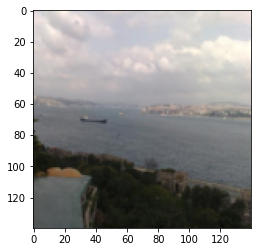

In [42]:
show_example(*dataset[0],dataset)

In [64]:
random_seed = 34
torch.manual_seed(random_seed)


In [65]:
import math

LEN_DATASET = len(dataset)
#LEN_TRAIN_SET = round(LEN_DATASET*0.8)
LEN_TRAIN_SET = math.floor(LEN_DATASET*0.8)
LEN_VALIDATION_SET = round(LEN_DATASET*0.1)
LEN_TEST_SET = round(LEN_DATASET*0.1)
print(LEN_DATASET)
print(LEN_TRAIN_SET+LEN_VALIDATION_SET+LEN_TEST_SET)
print(LEN_TRAIN_SET,LEN_VALIDATION_SET,LEN_TEST_SET)

8776
8776
7020 878 878


In [66]:
#Normalizar los datos
MEAN, DS = get_mean_and_std(DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True))

In [67]:
normalize_compose = transform.Compose([
    transform.Resize(RESIZE),
    transform.ToTensor(),
    transform.Normalize(MEAN, DS, inplace=False),
])

In [68]:
dataset = ImageFolder(DIR, transform=normalize_compose)

In [69]:
TRAIN_DATA, TEST_DATA,VALID_DATA = random_split(dataset, [LEN_TRAIN_SET, LEN_VALIDATION_SET,LEN_TEST_SET])

In [ ]:
dist_train = [ x[1] for x in TRAIN_DATA]
dist_test = [ x[1] for x in TEST_DATA]
dist_valid = [ x[1] for x in VALID_DATA]



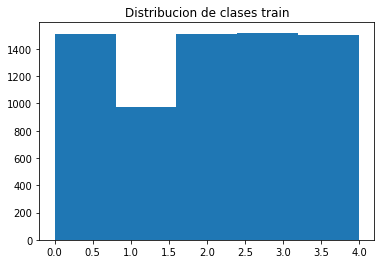

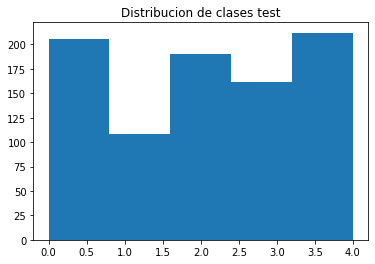

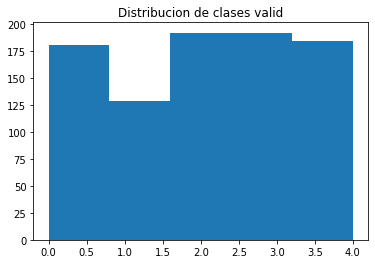

In [59]:
plt.hist(dist_train,bins=LEN_CLASES)
plt.title('Distribucion de clases train')
plt.show()
plt.hist(dist_test,bins=LEN_CLASES)
plt.title('Distribucion de clases test')
plt.show()
plt.hist(dist_valid,bins=LEN_CLASES)
plt.title('Distribucion de clases valid')
plt.show()

In [70]:
TRAIN_DL = DataLoader(TRAIN_DATA, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
VALID_DL = DataLoader(VALID_DATA, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
TEST_DL = DataLoader(TEST_DATA, batch_size=BATCH_SIZE, shuffle=True, num_workers= 4, pin_memory=True)

16


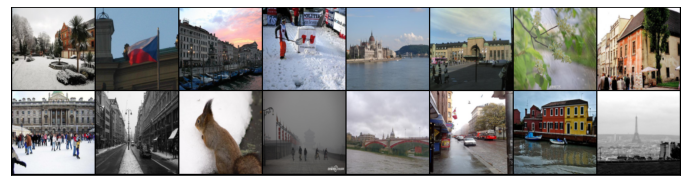

In [21]:
show_batch(TRAIN_DL)
#show_batch_denormalize(TRAIN_DL,MEAN,DS)

In [71]:
device = get_default_device()
print(device)

cuda


In [72]:
TRAIN_DEVICE_DL = DeviceDataLoader(TRAIN_DL, device)
VALID_DEVICE_DL = DeviceDataLoader(VALID_DL, device)
TEST_DEVICE_DL = DeviceDataLoader(TEST_DL, device)

In [73]:
learning_rate =  0.001
num_epochs = 10
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam

# Tiny Model CNN (3 CONV LAYERS + LINEAR LAYER)

In [58]:
#MODELO Tiny CNN
modeloSmall = to_device(CNNSmall(LEN_CLASES), device)

In [61]:
modeloSmall.load_state_dict(torch.load('db/cnnSmall'+LOAD_VERSION+'.pth'))
smodel = Model(modeloSmall)

Epoch [1/10],Loss Train 1.2260,val_loss:1.0965,Accuracy 0.5562
Epoch [2/10],Loss Train 0.9686,val_loss:0.8807,Accuracy 0.6734
Epoch [3/10],Loss Train 0.9161,val_loss:0.8861,Accuracy 0.6435
Epoch [4/10],Loss Train 0.8653,val_loss:0.7529,Accuracy 0.7140
Epoch [5/10],Loss Train 0.8097,val_loss:0.7898,Accuracy 0.7041
Epoch [6/10],Loss Train 0.7800,val_loss:0.7325,Accuracy 0.7351
Epoch [7/10],Loss Train 0.7536,val_loss:0.7609,Accuracy 0.7119
Epoch [8/10],Loss Train 0.7267,val_loss:0.9065,Accuracy 0.6925
Epoch [9/10],Loss Train 0.7139,val_loss:0.7173,Accuracy 0.7349
Epoch [10/10],Loss Train 0.6948,val_loss:0.7779,Accuracy 0.7167


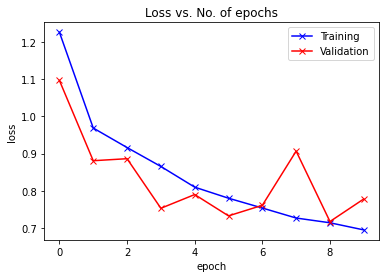

In [66]:
if(LOAD):
    modeloSmall.load_state_dict(torch.load('db/cnnSmall'+LOAD_VERSION+'.pth'))
    smodel = Model(modeloSmall)
else: 
    smodel = Model(modeloSmall)
    logSmall=smodel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logSmall)
    torch.save(modeloSmall.state_dict(), 'db/cnnSmall'+VERSION+'.pth')

In [28]:
#plot_losses(logSmall)

# Result for TRAIN DATASET

Error: 0.6576130390167236 Accuracy: 0.7417426109313965


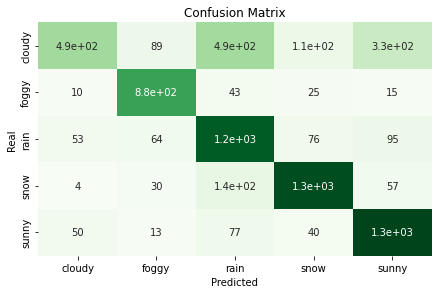

Sensitivity
74.17
Specificity
93.54
F1-score
74.17
Accuracy
74.17


In [68]:
smodelResTrain = smodel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",smodelResTrain['error'], "Accuracy:",smodelResTrain['acc'])
MatrixScore(smodelResTrain['outputs']['labels'],smodelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.7780962586402893 Accuracy: 0.7167207598686218


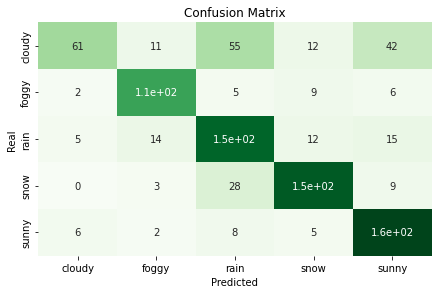

Sensitivity
71.64
Specificity
92.91
F1-score
71.64
Accuracy
71.64


In [69]:
smodelResValid = smodel.evaluate(VALID_DEVICE_DL,True)
print("Error:",smodelResValid['error'], "Accuracy:",smodelResValid['acc'])
MatrixScore(smodelResValid['outputs']['labels'],smodelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.8058419823646545 Accuracy: 0.709253191947937


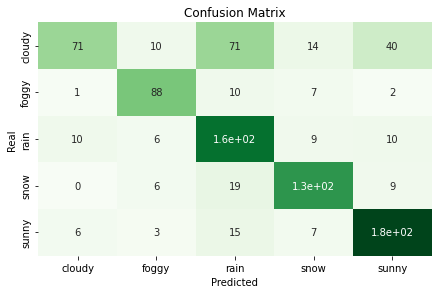

Sensitivity
70.96
Specificity
92.74
F1-score
70.96
Accuracy
70.96


In [64]:
smodelResTest = smodel.evaluate(TEST_DEVICE_DL,True)
print("Error:",smodelResTest['error'], "Accuracy:",smodelResTest['acc'])
MatrixScore(smodelResTest['outputs']['labels'],smodelResTest['outputs']['predicted'],CLASES)


In [32]:
#guardamos el modelo
#torch.save(modeloSmall.state_dict(), 'db/cnnSmall.pth')

#  Simple Model CNN (5 LAYERS + 1 LINEAR)

In [31]:
modeloSimple = to_device(CNNSimple(LEN_CLASES), device)

Epoch [1/10],Loss Train 1.1066,val_loss:1.9375,Accuracy 0.3560
Epoch [2/10],Loss Train 0.9153,val_loss:1.0380,Accuracy 0.6386
Epoch [3/10],Loss Train 0.8583,val_loss:0.9147,Accuracy 0.6519
Epoch [4/10],Loss Train 0.8028,val_loss:0.7755,Accuracy 0.7036
Epoch [5/10],Loss Train 0.7662,val_loss:0.8337,Accuracy 0.6846
Epoch [6/10],Loss Train 0.7326,val_loss:0.6788,Accuracy 0.7375
Epoch [7/10],Loss Train 0.6746,val_loss:0.7993,Accuracy 0.7070
Epoch [8/10],Loss Train 0.6497,val_loss:0.8015,Accuracy 0.6972
Epoch [9/10],Loss Train 0.6195,val_loss:0.6466,Accuracy 0.7719
Epoch [10/10],Loss Train 0.5800,val_loss:0.8400,Accuracy 0.6987


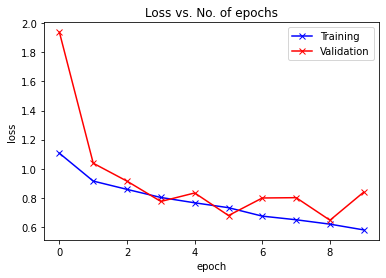

In [32]:
if(LOAD):
    modeloSimple.load_state_dict(torch.load('db/cnnSimple'+LOAD_VERSION+'.pth'))
    simModel = Model(modeloSimple)
else: 
    simModel = Model(modeloSimple)
    logSimple= simModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logSimple)
    torch.save(modeloSimple.state_dict(), 'db/cnnSimple'+VERSION+'.pth')

In [ ]:
#logSimple = simModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)

Epoch [1/20],Loss Train 1.5399,val_loss:1.2839,Accuracy 0.5818
Epoch [2/20],Loss Train 1.2122,val_loss:1.0051,Accuracy 0.6541
Epoch [3/20],Loss Train 1.0769,val_loss:0.9987,Accuracy 0.6547
Epoch [4/20],Loss Train 1.0083,val_loss:0.9366,Accuracy 0.6840
Epoch [5/20],Loss Train 0.9244,val_loss:0.8814,Accuracy 0.7155
Epoch [6/20],Loss Train 0.8826,val_loss:0.8189,Accuracy 0.7390
Epoch [7/20],Loss Train 0.8312,val_loss:0.8294,Accuracy 0.7392
Epoch [8/20],Loss Train 0.7464,val_loss:1.0157,Accuracy 0.6956
Epoch [9/20],Loss Train 0.7394,val_loss:0.8668,Accuracy 0.7317
Epoch [10/20],Loss Train 0.6834,val_loss:0.7714,Accuracy 0.7523
Epoch [11/20],Loss Train 0.6407,val_loss:0.7526,Accuracy 0.7598
Epoch [12/20],Loss Train 0.6240,val_loss:0.8365,Accuracy 0.7452
Epoch [13/20],Loss Train 0.5757,val_loss:0.7601,Accuracy 0.7801
Epoch [14/20],Loss Train 0.5423,val_loss:0.8050,Accuracy 0.7521
Epoch [15/20],Loss Train 0.4896,val_loss:0.7694,Accuracy 0.7919
Epoch [16/20],Loss Train 0.4602,val_loss:0.9109,A

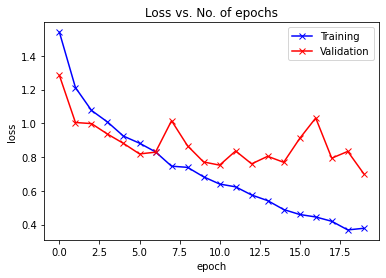

In [ ]:
#plot_losses(logSimple)

# Result for TRAIN DATASET

Error: 0.6771443486213684 Accuracy: 0.7386578917503357


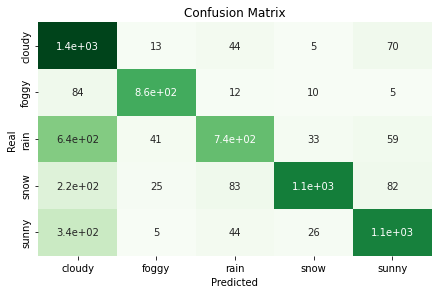

Sensitivity
73.87
Specificity
93.47
F1-score
73.87
Accuracy
73.87


In [33]:
simModelResTrain = simModel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",simModelResTrain['error'], "Accuracy:",simModelResTrain['acc'])
MatrixScore(simModelResTrain['outputs']['labels'],simModelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.8408112525939941 Accuracy: 0.6978895664215088


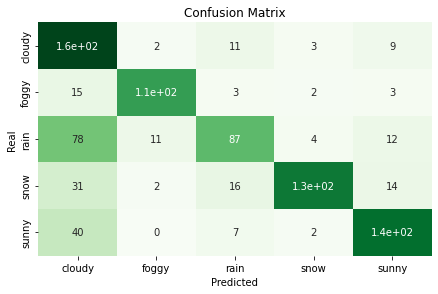

Sensitivity
69.82
Specificity
92.45
F1-score
69.82
Accuracy
69.82


In [34]:
simModelResValid = simModel.evaluate(VALID_DEVICE_DL,True)
print("Error:",simModelResValid['error'], "Accuracy:",simModelResValid['acc'])
MatrixScore(simModelResValid['outputs']['labels'],simModelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.8910751342773438 Accuracy: 0.6982142925262451


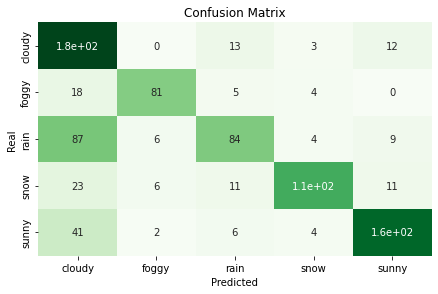

Sensitivity
69.82
Specificity
92.45
F1-score
69.82
Accuracy
69.82


In [35]:
simModelResTest = simModel.evaluate(TEST_DEVICE_DL,True)
print("Error:",simModelResTest['error'], "Accuracy:",simModelResTest['acc'])
MatrixScore(simModelResTest['outputs']['labels'],simModelResTest['outputs']['predicted'],CLASES)


#  ResNet Model CNN (8 LAYERS + 1 LINEAR)

In [26]:
modeloResnet = to_device(CNNResNet(LEN_CLASES), device)

Epoch [1/10],Loss Train 1.0781,val_loss:0.8236,Accuracy 0.6766
Epoch [2/10],Loss Train 0.8515,val_loss:1.1315,Accuracy 0.6159
Epoch [3/10],Loss Train 0.7612,val_loss:0.7262,Accuracy 0.7308
Epoch [4/10],Loss Train 0.6749,val_loss:0.5956,Accuracy 0.7773
Epoch [5/10],Loss Train 0.6143,val_loss:0.7163,Accuracy 0.7393
Epoch [6/10],Loss Train 0.6217,val_loss:0.5750,Accuracy 0.7873
Epoch [7/10],Loss Train 0.5134,val_loss:0.8552,Accuracy 0.7106
Epoch [8/10],Loss Train 0.5002,val_loss:0.6412,Accuracy 0.7709
Epoch [9/10],Loss Train 0.4466,val_loss:0.9871,Accuracy 0.6955
Epoch [10/10],Loss Train 0.4256,val_loss:0.5719,Accuracy 0.7898


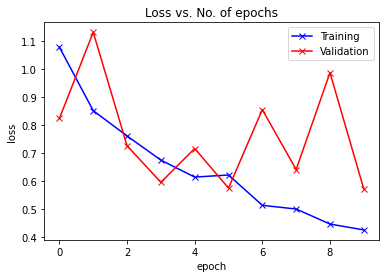

In [27]:
if(LOAD):
    modeloResnet.load_state_dict(torch.load('db/cnnResNet'+LOAD_VERSION+'.pth'))
    ResNetModel = Model(modeloResnet)
else: 
    ResNetModel = Model(modeloResnet)
    logResnet = ResNetModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)
    plot_losses(logResnet)
    torch.save(modeloResnet.state_dict(), 'db/cnnResNet'+VERSION+'.pth')

In [ ]:
# %%time
# logResnet = ResNetModel.train(optimizer,loss_fn,num_epochs,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)

Epoch [1/20],Loss Train 1.4034,val_loss:1.1947,Accuracy 0.6140
Epoch [2/20],Loss Train 1.0551,val_loss:1.0530,Accuracy 0.6605
Epoch [3/20],Loss Train 0.9120,val_loss:0.9096,Accuracy 0.7010
Epoch [4/20],Loss Train 0.7769,val_loss:0.7739,Accuracy 0.7604
Epoch [5/20],Loss Train 0.6783,val_loss:0.9024,Accuracy 0.7276
Epoch [6/20],Loss Train 0.6070,val_loss:0.8191,Accuracy 0.7417
Epoch [7/20],Loss Train 0.5034,val_loss:0.7710,Accuracy 0.7654
Epoch [8/20],Loss Train 0.5311,val_loss:0.7671,Accuracy 0.7787
Epoch [9/20],Loss Train 0.3808,val_loss:0.8568,Accuracy 0.7427
Epoch [10/20],Loss Train 0.3139,val_loss:0.7124,Accuracy 0.7753
Epoch [11/20],Loss Train 0.3363,val_loss:0.7007,Accuracy 0.7973
Epoch [12/20],Loss Train 0.2756,val_loss:0.7302,Accuracy 0.8002
Epoch [13/20],Loss Train 0.1926,val_loss:0.7827,Accuracy 0.7710
Epoch [14/20],Loss Train 0.1648,val_loss:0.7364,Accuracy 0.8075
Epoch [15/20],Loss Train 0.1733,val_loss:0.8596,Accuracy 0.7728
Epoch [16/20],Loss Train 0.1729,val_loss:0.7490,A

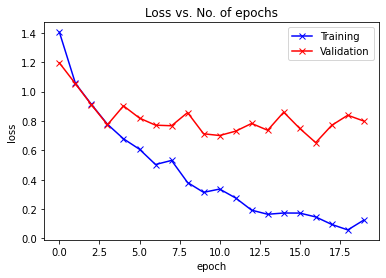

In [ ]:
# plot_losses(logResnet)

# Result for TRAIN DATASET

Error: 0.2463674396276474 Accuracy: 0.9096906185150146


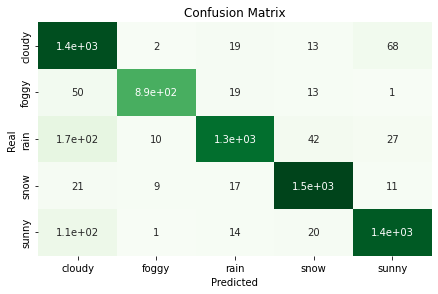

Sensitivity
90.97
Specificity
97.74
F1-score
90.97
Accuracy
90.97


In [28]:
ResNetModelResTrain = ResNetModel.evaluate(TRAIN_DEVICE_DL,True)
print("Error:",ResNetModelResTrain['error'], "Accuracy:",ResNetModelResTrain['acc'])
MatrixScore(ResNetModelResTrain['outputs']['labels'],ResNetModelResTrain['outputs']['predicted'],CLASES)

# Result for VALIDATION DATASET

Error: 0.5708522796630859 Accuracy: 0.7905844449996948


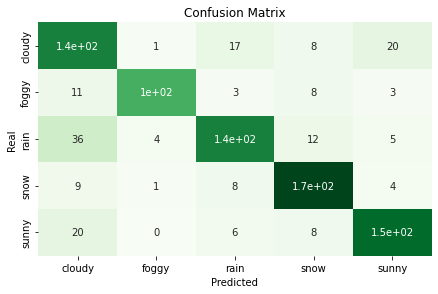

Sensitivity
79.04
Specificity
94.76
F1-score
79.04
Accuracy
79.04


In [29]:
ResNetModelResValid = ResNetModel.evaluate(VALID_DEVICE_DL,True)
print("Error:",ResNetModelResValid['error'], "Accuracy:",ResNetModelResValid['acc'])
MatrixScore(ResNetModelResValid['outputs']['labels'],ResNetModelResValid['outputs']['predicted'],CLASES)

# Result for TEST DATASET

Error: 0.5762181282043457 Accuracy: 0.8063311576843262


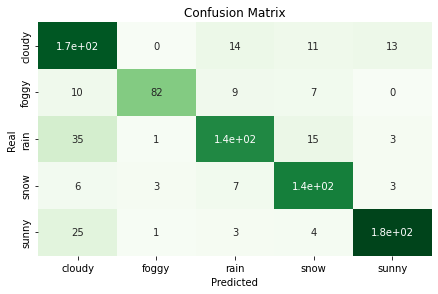

Sensitivity
80.64
Specificity
95.16
F1-score
80.64
Accuracy
80.64


In [30]:
ResNetModelResTest = ResNetModel.evaluate(TEST_DEVICE_DL,True)
print("Error:",ResNetModelResTest['error'], "Accuracy:",ResNetModelResTest['acc'])
MatrixScore(ResNetModelResTest['outputs']['labels'],ResNetModelResTest['outputs']['predicted'],CLASES)


In [ ]:
#guardamos el modelo
#torch.save(modeloResnet.state_dict(), 'db/cnnResNet.pth')

# Test with images in Google

In [ ]:
#Load new Dataset
# DIR_NEW = './otherdataset'
# OTHER_DATA_SET = ImageFolder(DIR_NEW,transform=normalize_compose)

In [ ]:
# OTHER_DL = DataLoader(OTHER_DATA_SET, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# OTHER_DEVICE_LOADER = DeviceDataLoader(OTHER_DL, device)

Error: 0.4145500361919403 Accuracy: 0.9090909361839294


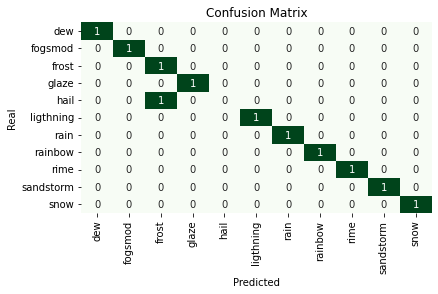

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [ ]:
# smodelResTrainO = smodel.evaluate(OTHER_DEVICE_LOADER,True)
# print("Error:",smodelResTrainO['error'], "Accuracy:",smodelResTrainO['acc'])
# MatrixScore(smodelResTrainO['outputs']['labels'],smodelResTrainO['outputs']['predicted'],OTHER_DATA_SET.classes)

Label: dew , Predicted: dew


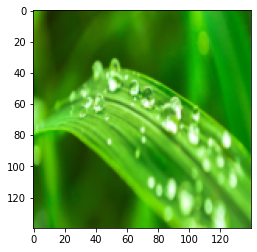

In [ ]:
# #print(OTHER_DATA_SET[0])
# img1,label1= OTHER_DATA_SET[0]
# plt.imshow(img1.permute(1, 2, 0))
# print('Label:', OTHER_DATA_SET.classes[label1], ', Predicted:', smodel.predict(img1,OTHER_DATA_SET.classes,device,to_device))

Label: fogsmod , Predicted: fogsmod


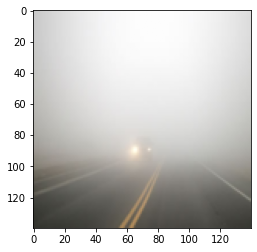

In [ ]:
# #print(OTHER_DATA_SET[0])
# img2,label2= OTHER_DATA_SET[1]
# plt.imshow(img2.permute(1, 2, 0))
# print('Label:', OTHER_DATA_SET.classes[label2], ', Predicted:', smodel.predict(img2,OTHER_DATA_SET.classes,device,to_device))

Label: frost , Predicted: frost


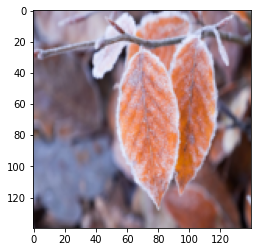

In [ ]:
# #print(OTHER_DATA_SET[0])
# img3,label3= OTHER_DATA_SET[2]
# plt.imshow(img3.permute(1, 2, 0))
# print('Label:', OTHER_DATA_SET.classes[label3], ', Predicted:', smodel.predict(img3,OTHER_DATA_SET.classes,device,to_device))

Label: glaze , Predicted: glaze


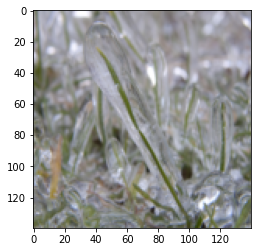

In [ ]:
# #print(OTHER_DATA_SET[0])
# img4,label4= OTHER_DATA_SET[3]
# plt.imshow(img4.permute(1, 2, 0))
# print('Label:', OTHER_DATA_SET.classes[label4], ', Predicted:', smodel.predict(img4,OTHER_DATA_SET.classes,device,to_device))

Error: 0.21177300810813904 Accuracy: 0.9090909361839294


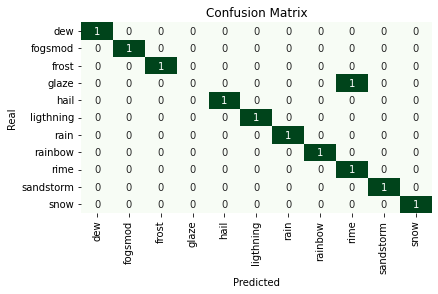

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [ ]:
# simModelResTesto = simModel.evaluate(OTHER_DEVICE_LOADER,True)
# print("Error:",simModelResTesto['error'], "Accuracy:",simModelResTesto['acc'])
# MatrixScore(simModelResTesto['outputs']['labels'],simModelResTesto['outputs']['predicted'],OTHER_DATA_SET.classes)

Error: 0.23877111077308655 Accuracy: 0.9090909361839294


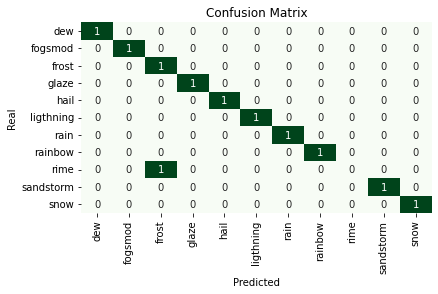

Sensitivity
90.91
Specificity
99.09
F1-score
90.91
Accuracy
90.91


In [ ]:
# ResTesto = ResNetModel.evaluate(OTHER_DEVICE_LOADER,True)
# print("Error:",ResTesto['error'], "Accuracy:",ResTesto['acc'])
# MatrixScore(ResTesto['outputs']['labels'],ResTesto['outputs']['predicted'],OTHER_DATA_SET.classes)


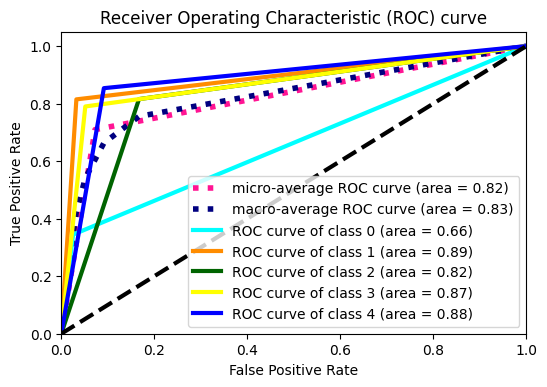

In [65]:
plot_roc_curve(smodelResTest['outputs']['labels'],smodelResTest['outputs']['predicted'])

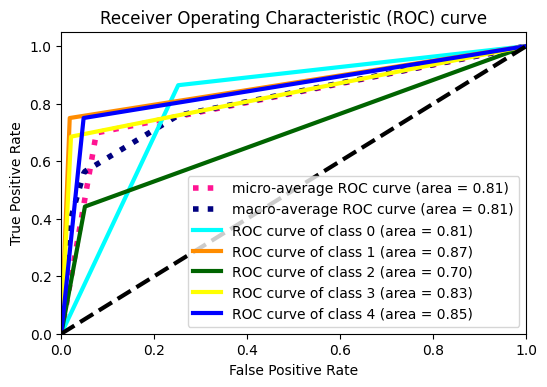

In [37]:
plot_roc_curve(simModelResTest['outputs']['labels'],simModelResTest['outputs']['predicted'])

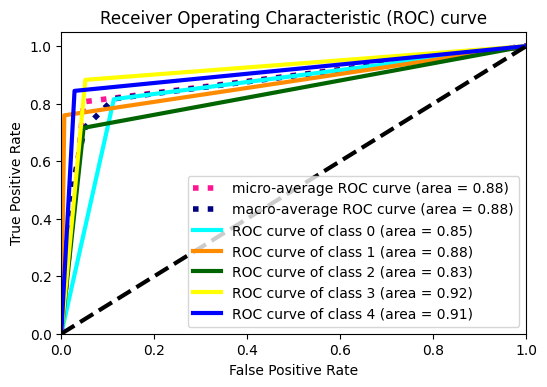

In [38]:
plot_roc_curve(ResNetModelResTest['outputs']['labels'],ResNetModelResTest['outputs']['predicted'])

In [21]:
#TRANSFER LEERNING RESNET18
resnet18 = torchvision.models.resnet18(pretrained=True)
for e in resnet18.parameters():
    e.requires_grad = False
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, LEN_CLASES)
resnet18 = to_device(resnet18, device)
resnet18Model = Model(resnet18)
resultResnet18 = resnet18Model.train(optimizer,loss_fn,20,TRAIN_DEVICE_DL,VALID_DEVICE_DL,learning_rate)

Epoch [1/20],Loss Train 1.1313,val_loss:0.7455,Accuracy 0.7562
Epoch [2/20],Loss Train 0.7205,val_loss:0.6125,Accuracy 0.8050
Epoch [3/20],Loss Train 0.6263,val_loss:0.5892,Accuracy 0.8073
Epoch [4/20],Loss Train 0.5880,val_loss:0.5894,Accuracy 0.8140
Epoch [5/20],Loss Train 0.5632,val_loss:0.5979,Accuracy 0.8117
Epoch [6/20],Loss Train 0.5335,val_loss:0.5798,Accuracy 0.8133
Epoch [7/20],Loss Train 0.5336,val_loss:0.5901,Accuracy 0.8092
Epoch [8/20],Loss Train 0.5109,val_loss:0.5621,Accuracy 0.8241
Epoch [9/20],Loss Train 0.5112,val_loss:0.5750,Accuracy 0.8081
Epoch [10/20],Loss Train 0.4983,val_loss:0.5744,Accuracy 0.8086
Epoch [11/20],Loss Train 0.4866,val_loss:0.5850,Accuracy 0.8164
Epoch [12/20],Loss Train 0.4890,val_loss:0.5598,Accuracy 0.8133
Epoch [13/20],Loss Train 0.4851,val_loss:0.6802,Accuracy 0.7797
Epoch [14/20],Loss Train 0.4847,val_loss:0.5926,Accuracy 0.8063
Epoch [15/20],Loss Train 0.4764,val_loss:0.5992,Accuracy 0.8119
Epoch [16/20],Loss Train 0.4628,val_loss:0.6082,A

In [34]:
torch.save(resnet18.state_dict(), 'db/cnnRes16Netbest.pth')

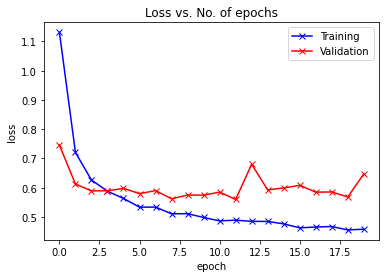

In [30]:
#save model
plot_losses(resultResnet18)

Error: 0.5763912796974182 Accuracy: 0.8309800624847412


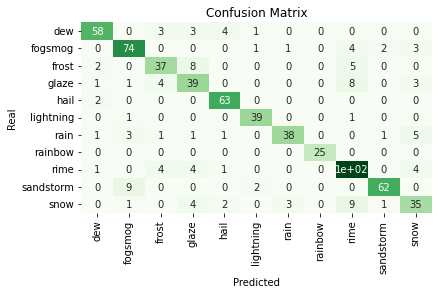

Sensitivity
83.09
Specificity
98.31
F1-score
83.09
Accuracy
83.09


In [33]:
ResNet18ResTest = resnet18Model.evaluate(TEST_DEVICE_DL,True)
print("Error:",ResNet18ResTest['error'], "Accuracy:",ResNet18ResTest['acc'])
MatrixScore(ResNet18ResTest['outputs']['labels'],ResNet18ResTest['outputs']['predicted'],CLASES)

In [ ]:
#TRANSFER LEERNING RESNET18
# resnet18D2 = torchvision.models.resnet18(pretrained=True)
# for e in resnet18D2.parameters():
#     e.requires_grad = False
# num_ftrsd2 = resnet18D2.fc.in_features
# resnet18D2.fc = nn.Linear(num_ftrsd2, LEN_CLASES)
# resnet18D2 = to_device(resnet18D2, device)
# resnet18D2Model = Model(resnet18D2)
# resultResnet18D2 = resnet18D2Model.train(optimizer,loss_fn,10,TRAIN_DEVICE_DL,VALID_DEVICE_DL,0.017)